In [1]:
from queue import Queue
import cv2
from eye import Eye
from PyQt5.QtCore import pyqtSignal, QThread
import numpy as np
from time import sleep
import os
from matplotlib import pyplot as plt

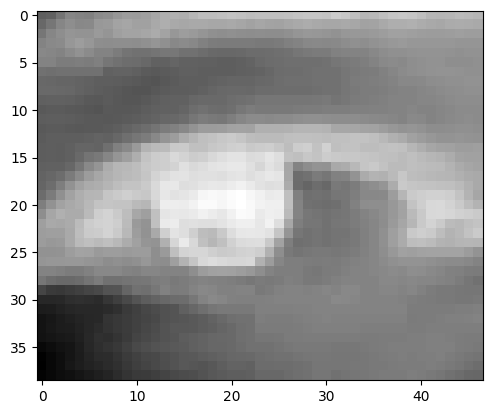

In [2]:
img = cv2.imread('Eye_1_left.png')
img = img[:, :, 2]
img = np.invert(img)

param_x = 0.3
param_y = 0.15

img = img[int(img.shape[0] * param_x / 2): img.shape[0] - int(img.shape[0] * param_x / 2), 
          int(img.shape[1] * param_y / 2): img.shape[1] - int(img.shape[1] * param_y / 2),]

plt.imshow(img, cmap='gray')
plt.show()

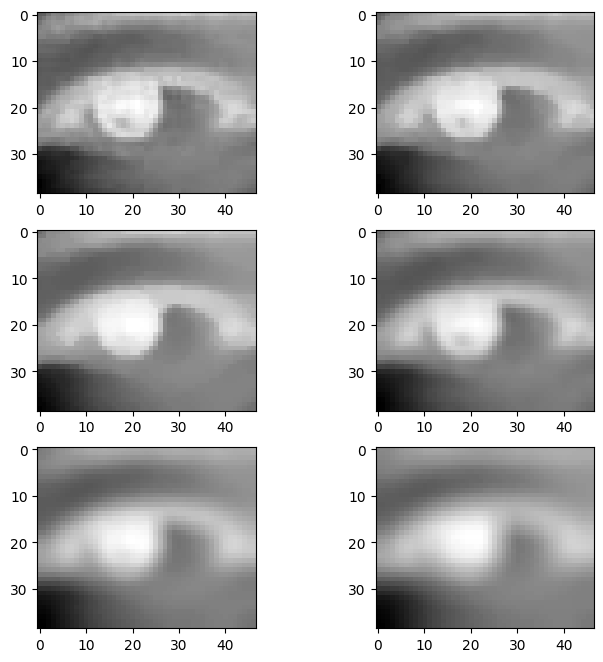

In [24]:
eye_blur = []

eye_blur += [cv2.medianBlur(img, 1)]
eye_blur += [cv2.medianBlur(img, 3)]
eye_blur += [cv2.medianBlur(img, 5)]
eye_blur += [cv2.blur(img,(3, 3))]
eye_blur += [cv2.blur(img,(5, 5))]
eye_blur += [cv2.blur(img,(7, 7))]

w = 10
h = 10
fig = plt.figure(figsize=(8, 8))

columns = 2
rows = 3

for i in range(columns * rows):
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(eye_blur[i], cmap='gray')

plt.show()

255 0


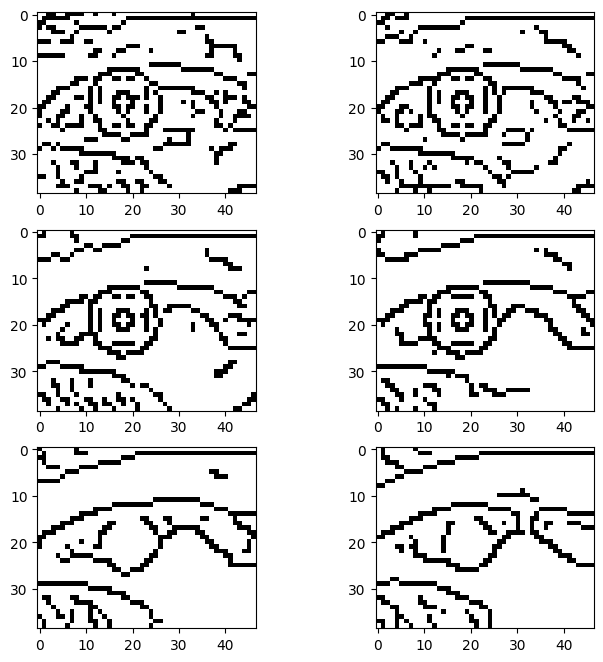

In [21]:
t_lower = 15  # Lower Threshold 
t_upper = 30  # Upper threshold 

eye_canny = []
  
for i in range(len(eye_blur)):
    eye_canny += [cv2.Canny(eye_blur[i], t_lower, t_upper)]

w = 10
h = 10
fig = plt.figure(figsize=(8, 8))

columns = 2
rows = 3

print(np.max(eye_canny), np.min(eye_canny))

for i in range(columns * rows):
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(eye_canny[i], cmap='binary')

plt.show()

[[[18.5  19.5   7.25]]]
[[[18.5  19.5   7.35]]]
[[[18.5  19.5   7.35]]]
[[[18.5 19.5  7.2]]]
None
None


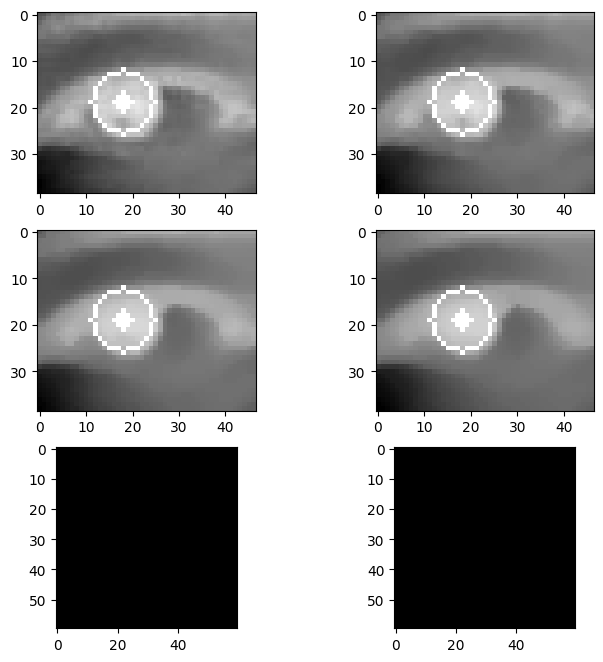

In [5]:
fig = plt.figure(figsize=(8, 8))

for i in range(len(eye_blur)):
    circle = cv2.HoughCircles(eye_blur[i], cv2.HOUGH_GRADIENT, 1, 10,
                              param1=30,
                              param2=15,
                              minRadius=7,
                              maxRadius=15)
    
    print(circle)
    
    if circle is not None:
        circle = np.reshape(circle, (-1, 3))
    
        for c in circle:
            cv2.circle(eye_blur[i],
                       (int(c[0]), int(c[1])),
                       2,
                       (255, 0, 0),
                       thickness=-1)

            cv2.circle(eye_blur[i],
                       (int(c[0]), int(c[1])),
                       int(c[2]),
                       (255, 0, 0),
                       thickness=1)

        fig.add_subplot(rows, columns, i + 1)
        plt.imshow(eye_blur[i], cmap='gray')
    else:
        fig.add_subplot(rows, columns, i + 1)
        plt.imshow(np.zeros((60, 60), dtype=np.uint8), cmap='gray')

plt.show()

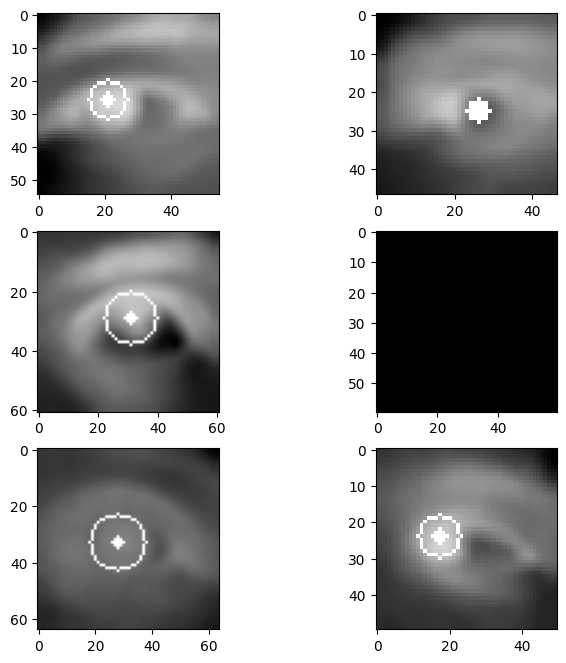

In [29]:
blur_mask_size = 5 # 11

canny_param_1 = 30
canny_param_2 = 13

min_radius = 2
max_radius = 12

min_dist = 1

eye_images = [np.invert(cv2.imread('Eye_1_left.png')[:, :, 2])]
eye_images += [np.invert(cv2.imread('Eye_1_right.png')[:, :, 2])]

eye_images += [np.invert(cv2.imread('Eye_1_up.png')[:, :, 2])]
eye_images += [np.invert(cv2.imread('Eye_1_mid.png')[:, :, 2])]

eye_images += [np.invert(cv2.imread('Eye_0.png')[:, :, 2])]
eye_images += [np.invert(cv2.imread('Eye_0_right.png')[:, :, 2])]

for eye_n, eye in enumerate(eye_images):
    # eye_images[eye_n] = cv2.medianBlur(eye, blur_mask_size)
    eye_images[eye_n] = cv2.blur(eye,(blur_mask_size, blur_mask_size))
    
w = 10
h = 10
fig = plt.figure(figsize=(8, 8))

for i in range(len(eye_images)):
    circle = cv2.HoughCircles(eye_images[i], cv2.HOUGH_GRADIENT, 1, min_dist,
                              param1=canny_param_1,
                              param2=canny_param_2,
                              minRadius=min_radius,
                              maxRadius=max_radius)
    
    if circle is not None:
        circle = np.reshape(circle, (-1, 3))
    
        closest_circle = [0, 0, 0, 9999]
        
        for c in circle:
            dist = np.sqrt((c[0])**2 + (c[1])**2)
            
            if dist < closest_circle[3]:
                closest_circle = [c[0], c[1], c[2], dist]

                # Print closest circle.
        cv2.circle(eye_images[i],
                   (int(closest_circle[0]),int(closest_circle[1])),
                   2,
                   (255, 0, 0),
                   thickness=-1)
        cv2.circle(eye_images[i],
                   (int(closest_circle[0]), int(closest_circle[1])),
                   int(closest_circle[2]),
                   (255, 0, 0),
                   thickness=1)

        fig.add_subplot(rows, columns, i + 1)
        plt.imshow(eye_images[i], cmap='gray')
    else:
        fig.add_subplot(rows, columns, i + 1)
        plt.imshow(np.zeros((60, 60), dtype=np.uint8), cmap='gray')

plt.show()